<h1 style="text-align :center;">Analyse des risques liés aux avions</h1>

#### Importation des bibliotheque

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Chargement des donneés

In [ ]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Sby\cours en ligne\Data science\archive (1)\AviationData.csv",encoding="latin1")
data.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_6368\849071530.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\HP\Desktop\Sby\cours en ligne\Data science\archive (1)\AviationData.csv",encoding="latin1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### Description des donneés

In [12]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
data.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  Uni

#### Exploration et nettoyage des données

In [ ]:

# Gestion des valeur manquantes
data.fillna({'Weather.Condition': 'UNK', 'Broad.phase.of.flight': 'UNKNOWN'}, inplace=True)

# Filtrer les colonnes important
colonne = ['Make', 'Model', 'Injury.Severity', 'Aircraft.damage', 
        'Weather.Condition', 'Broad.phase.of.flight', 'Total.Fatal.Injuries']
data = data[colonne]
#Gestion de la modalité unknow
data["Broad.phase.of.flight"]=data['Broad.phase.of.flight'].str.lower()

# Creation de Categories pour la variable severity
def categorize_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Injury.Severity'] == 'Non-Fatal':
        return 'Non-Fatal'
    else:
        return 'No Injuries'

data['Severity'] = data.apply(categorize_severity, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_6368\2783020764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({'Weather.Condition': 'UNK', 'Broad.phase.of.flight': 'UNKNOWN'}, inplace=True)


#### Analyse des Données

##### 1- Modèles d’avions selon la gravité des accidents

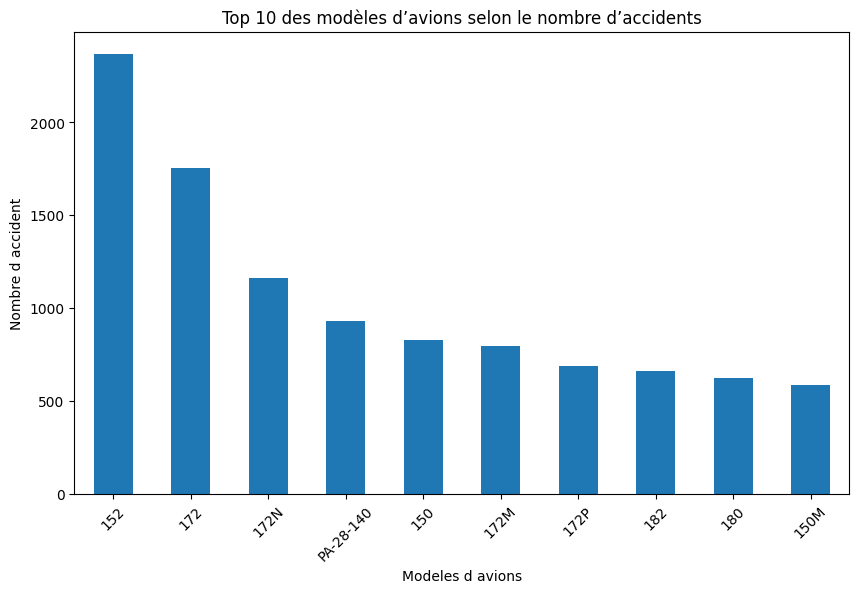

In [15]:
model_counts = data['Model'].value_counts().head(10)
plt.figure(figsize=(10,6))
model_counts.plot(kind='bar')
plt.title("Top 10 des modèles d’avions selon le nombre d’accidents")
plt.ylabel('Nombre d accident')
plt.xlabel('Modeles d avions')
plt.xticks(rotation=45)
plt.show()

##### 2- Gravité des accidents selon les conditions météorologiques

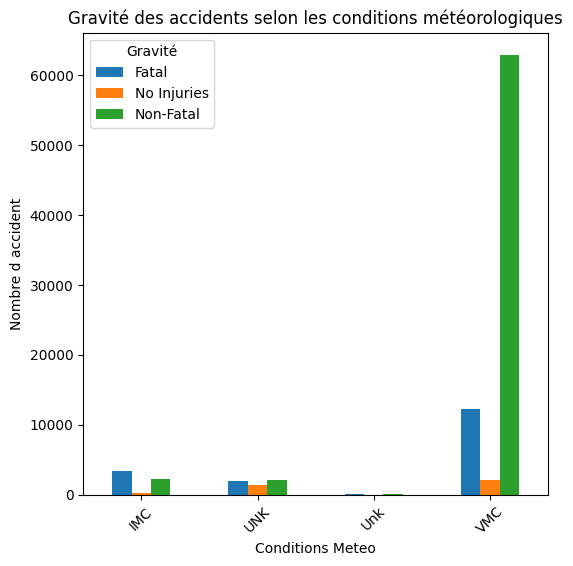

In [18]:

Cond_Meteo = pd.crosstab(data['Weather.Condition'], data['Severity'])
Cond_Meteo.plot(kind='bar',  figsize=(6,6))
plt.title('Gravité des accidents selon les conditions météorologiques')
plt.ylabel('Nombre d accident')
plt.xlabel('Conditions Meteo')
plt.xticks(rotation=45)
plt.legend(title='Gravité')
plt.show()

##### 3- Les phases de vol présentant le plus de risques

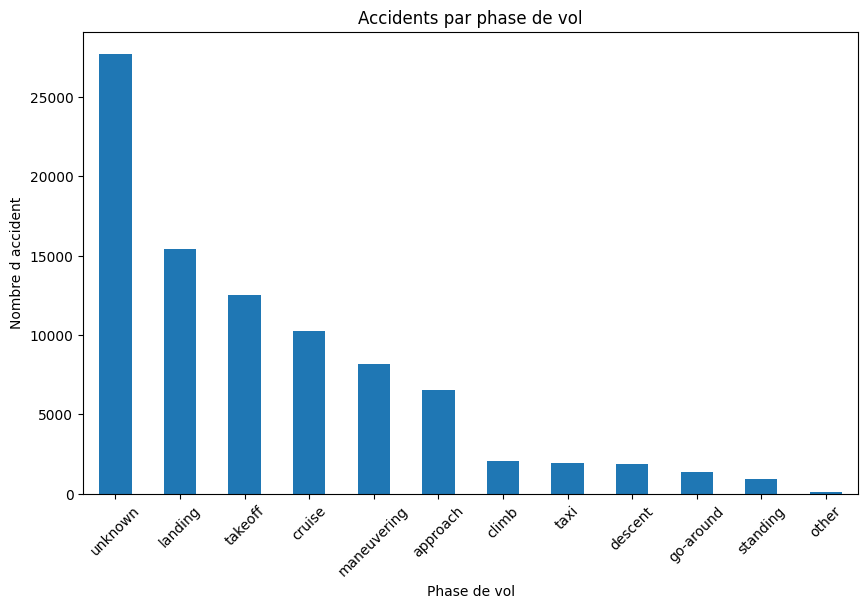

In [27]:
# Accidents by flight phase
phase_counts = data['Broad.phase.of.flight'].value_counts()
plt.figure(figsize=(10,6))
phase_counts.plot(kind='bar')
plt.title('Accidents par phase de vol')
plt.ylabel('Nombre d accident')
plt.xlabel('Phase de vol')
plt.xticks(rotation=45)
plt.show()

#### Remarques ✈️

---
##### ✅ Modèles d’avions les plus sûrs
Les **Cessna 172** et **Piper PA-28** enregistrent un nombre élevé d’accidents, mais présentent un **faible taux de mortalité par accident**, ce qui en fait des **options relativement sûres**.



##### 🌦️ Impact des conditions météorologiques
La majorité des accidents surviennent en **conditions météorologiques de vol à vue (VMC)**.  
Cependant, les **conditions de vol aux instruments (IMC)** sont associées à des **taux de mortalité plus élevés**.



##### ⚠️ Phases critiques du vol
Le **décollage** et l’**atterrissage** représentent **plus de 40 % des accidents**.  
Cela indique que ces phases exigent une **attention particulière** en matière de **formation** et de **procédures de sécurité**.

---



### Recommendations

---
#### 🛩️ Acquisition d’aéronefs
Envisager l’achat des modèles **Cessna 172 et Piper PA-28**, en raison de leurs bons antécédents en matière de sécurité et de leurs faibles taux de mortalité par accident.

#### 👨‍✈️ Formation des pilotes
Investir dans une formation spécialisée pour les procédures de décollage/atterrissage et le pilotage en conditions IMC (vol aux instruments), afin de réduire les risques d’accident.

#### 📋 Politiques opérationnelles
Mettre en place des protocoles météorologiques stricts et exiger la maîtrise du vol aux instruments pour tous les pilotes, afin d’atténuer les risques liés aux conditions météorologiques.

---